In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 244
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [3]:
Dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Disease_Dataset",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE)

Found 8000 files belonging to 5 classes.


In [4]:
class_names = Dataset.class_names
class_names

['ALL TEST', 'AML TEST', 'CLL TEST', 'CML TEST', 'Normal cells dataset']

In [5]:
len(Dataset)     #250*32

250

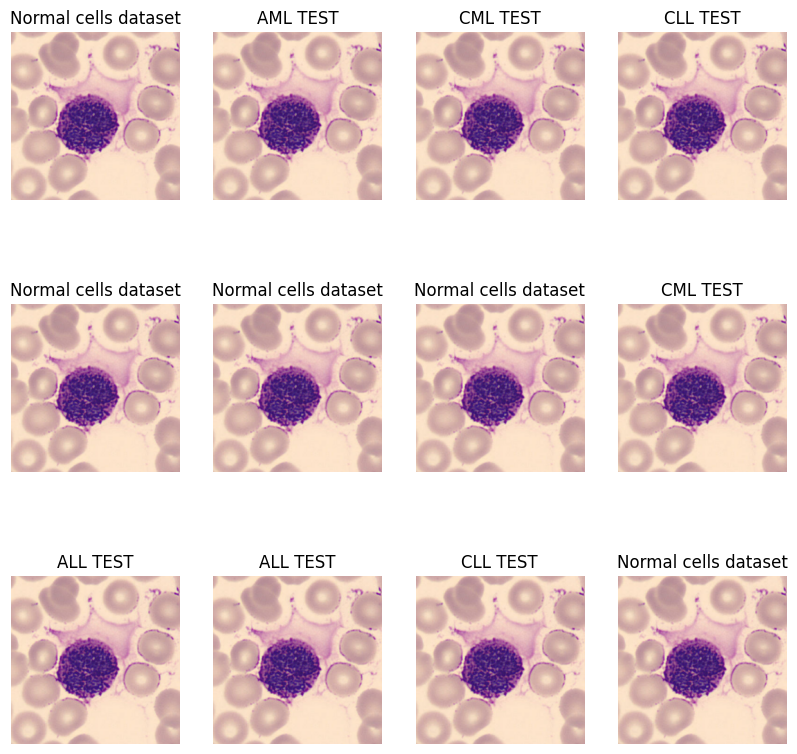

In [6]:
plt.figure(figsize = (10,10))
for image_batch, label_batch in Dataset.take(1):
    #print(image_batch[0].shape)
    #print(label_batch.numpy())

    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[0].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
    

80% ==> Training
20% ==> 10% validation, 10% test

In [7]:
train_size = 0.8
len(Dataset)*train_size

200.0

In [8]:
train_ds = Dataset.take(200)
len(train_ds)

200

In [9]:
test_ds = Dataset.skip(200)
len(test_ds)

50

In [10]:
val_size = 0.1
len(Dataset)*val_size

25.0

In [11]:
val_ds = test_ds.take(25)
len(val_ds)

25

In [12]:
test_ds = test_ds.skip(25)
len(test_ds)

25

In [13]:
# Python function to integrate all of the above
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [14]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(Dataset)

In [15]:
len(train_ds)

200

In [16]:
len(val_ds)

25

In [17]:
len(test_ds)

25

In [18]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [19]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])                       

In [20]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

# Building & Training CNN Model

In [21]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 5
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation = "relu", input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = "relu"),
    layers.Dense(n_classes, activation = "softmax")
])


C:\Users\91863\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(
    optimizer = "adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [24]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 274s 1s/step - accuracy: 0.6500 - loss: 0.8112 - val_accuracy: 0.7125 - val_loss: 0.6357
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 166s 829ms/step - accuracy: 0.7358 - loss: 0.6071 - val_accuracy: 0.7950 - val_loss: 0.5145
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 152s 758ms/step - accuracy: 0.7605 - loss: 0.5539 - val_accuracy: 0.7912 - val_loss: 0.4772
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 385s 2s/step - accuracy: 0.7636 - loss: 0.5451 - val_accuracy: 0.8338 - val_loss: 0.4072
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 147s 737ms/step - accuracy: 0.7872 - loss: 0.4972 - val_accuracy: 0.8500 - val_loss: 0.3729
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 459s 2s/step - accuracy: 0.7995 - loss: 0.4723 - val_accuracy: 0.8587 - val_loss: 0.3548
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 148s 735ms/step - accuracy: 0.8138 - loss: 0.4499 - val_accuracy: 0.8125 - val_loss: 0.4368
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 375s 2s/step - accuracy: 0.8206 - loss: 0.433

In [25]:
scores = model.evaluate(test_ds)

25/25 ━━━━━━━━━━━━━━━━━━━━ 78s 331ms/step - accuracy: 0.9775 - loss: 0.0594


In [27]:
scores

[0.0594167560338974, 0.9775000214576721]

In [28]:
history

In [29]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 200}

In [30]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

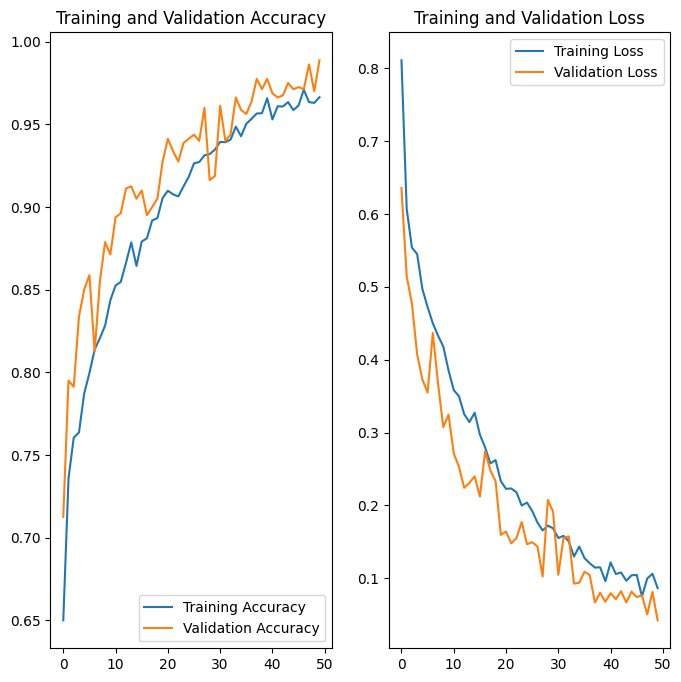

In [32]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label = 'Training Loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.show()

First image to predict
actual label : Normal cells dataset
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
predicted label : Normal cells dataset


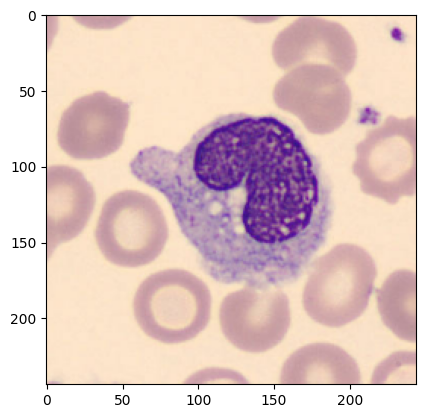

In [33]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

   first_image = images_batch[0].numpy().astype('uint8')
   first_label = labels_batch[0]

   print("First image to predict")
   plt.imshow(first_image)
   print("actual label :", class_names[first_label])

   batch_prediction = model.predict(images_batch)
   print("predicted label :",class_names[np.argmax(batch_prediction[0])])

In [34]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


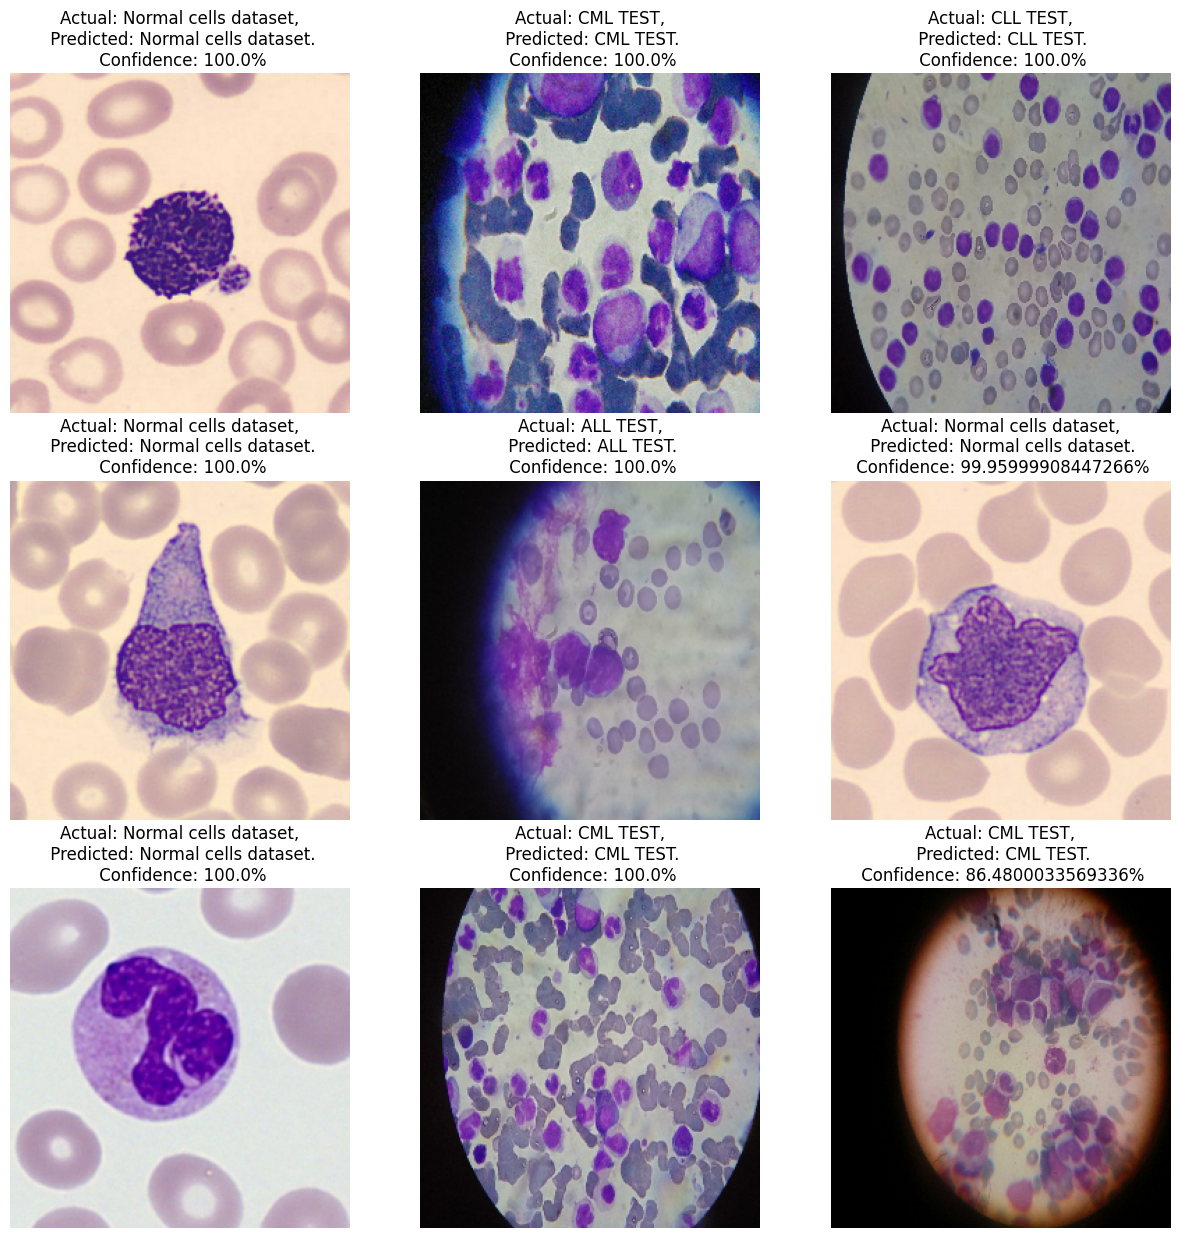

In [35]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis('off')

In [36]:
import os
model_dir = "C:/Users/91863/Documents/Leukemia_Disease/Models"
model_version = max([int(i) for i in os.listdir(model_dir) + ["0"]]) + 1

save_path = f"{model_dir}/{model_version}.keras"

# Save the model in Keras format
model.save(save_path)

print("Model saved at:", save_path)

Model saved at: C:/Users/91863/Documents/Leukemia_Disease/Models/3.keras
